-------

# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# добавляем библиотеки и открываем файл

In [2]:
data.head(10) # смотрим первые 10 строк

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00000,108.00000,2019-03-07T00:00:00,3,2.70000,16.00000,51.00000,8,NaN,...,25.00000,NaN,Санкт-Петербург,18863.00000,16028.00000,1.00000,482.00000,2.00000,755.00000,NaN
1,7,3350000.00000,40.40000,2018-12-04T00:00:00,1,NaN,11.00000,18.60000,1,NaN,...,11.00000,2.00000,посёлок Шушары,12817.00000,18603.00000,0.00000,NaN,0.00000,NaN,81.00000
2,10,5196000.00000,56.00000,2015-08-20T00:00:00,2,NaN,5.00000,34.30000,4,NaN,...,8.30000,0.00000,Санкт-Петербург,21741.00000,13933.00000,1.00000,90.00000,2.00000,574.00000,558.00000
3,0,64900000.00000,159.00000,2015-07-24T00:00:00,3,NaN,14.00000,NaN,9,NaN,...,NaN,0.00000,Санкт-Петербург,28098.00000,6800.00000,2.00000,84.00000,3.00000,234.00000,424.00000
4,2,10000000.00000,100.00000,2018-06-19T00:00:00,2,3.03000,14.00000,32.00000,13,NaN,...,41.00000,NaN,Санкт-Петербург,31856.00000,8098.00000,2.00000,112.00000,1.00000,48.00000,121.00000
5,10,2890000.00000,30.40000,2018-09-10T00:00:00,1,NaN,12.00000,14.40000,5,NaN,...,9.10000,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00000
6,6,3700000.00000,37.30000,2017-11-02T00:00:00,1,NaN,26.00000,10.60000,6,NaN,...,14.40000,1.00000,посёлок Парголово,52996.00000,19143.00000,0.00000,NaN,0.00000,NaN,155.00000
7,5,7915000.00000,71.60000,2019-04-18T00:00:00,2,NaN,24.00000,NaN,22,NaN,...,18.90000,2.00000,Санкт-Петербург,23982.00000,11634.00000,0.00000,NaN,0.00000,NaN,NaN
8,20,2900000.00000,33.16000,2018-05-23T00:00:00,1,NaN,27.00000,15.43000,26,NaN,...,8.81000,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00000
9,18,5400000.00000,61.00000,2017-02-26T00:00:00,3,2.50000,9.00000,43.60000,7,NaN,...,6.50000,2.00000,Санкт-Петербург,50898.00000,15008.00000,0.00000,NaN,0.00000,NaN,289.00000


In [3]:
data.info() # инфо по данным

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

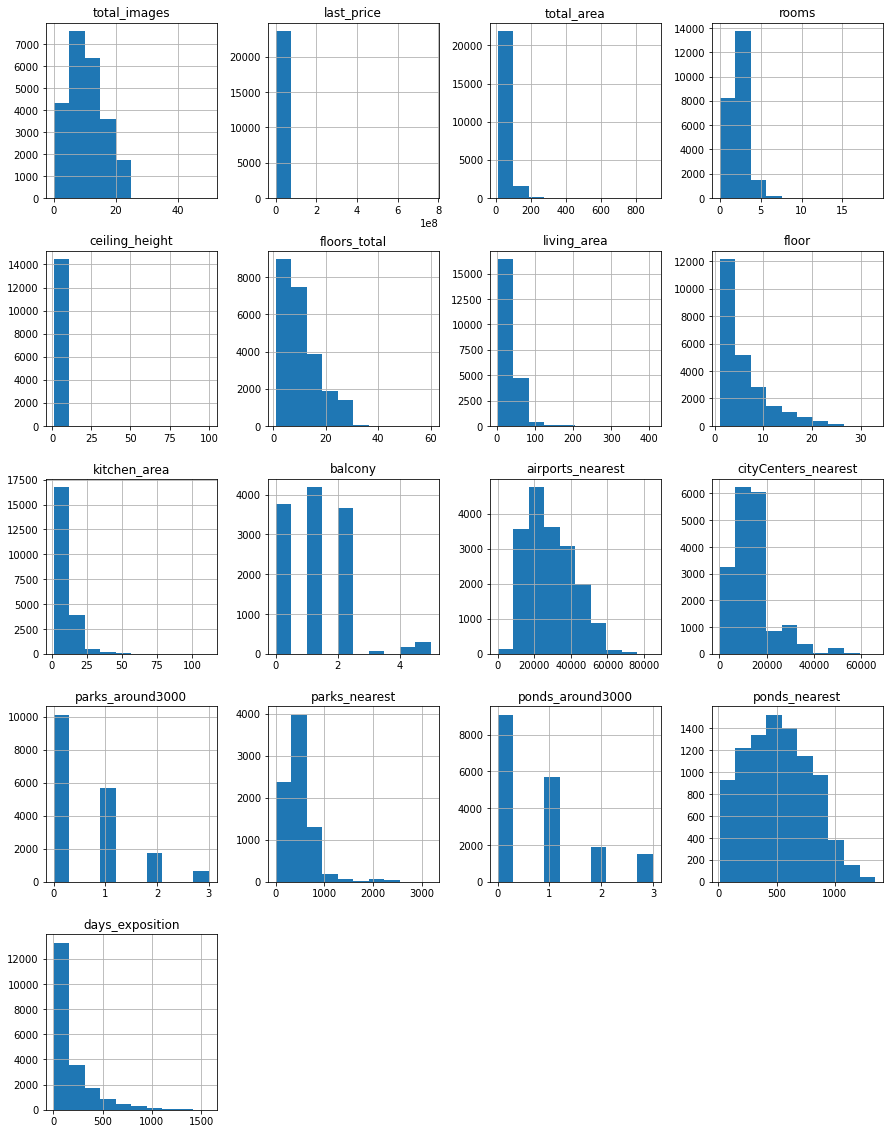

In [4]:
data.hist(figsize=(15, 20))

In [5]:
# проверим значения через value_counts() и unique()
#data[''].value_counts().sort_index()
# data[''].unique()
data.isna().sum()


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Вывод по данным 

- **0   total_images          23699 non-null  int64**    - пропусков нет, не трогаем данные
- **1   last_price            23699 non-null  float64**  - пропусков нет, не трогаем данные
- **2   total_area            23699 non-null  float64**  - пропусков нет, не трогаем данные, слегка смущают площади ~900, может это дома или пентхаусы (в задании указано, что это квартиры, но лучше уточнить такие данные)
- **3   first_day_exposition  23699 non-null  object**   - пропусков нет, заменить тип данный на дату/время
- **4   rooms                 23699 non-null  int64**    - пропусков нет, в кол-ве комнат есть нули, не трогаем данные
- **5   ceiling_height        14504 non-null  float64**  - есть пропуски, есть значения, которые нужно проверить, слишком высокие потолки.
- **6   floors_total          23613 non-null  float64**  - есть пропуски, заменить на нули, целые числа, заменить на int
- **7   living_area           21796 non-null  float64**  - есть пропуски, заменить на нули
- **8   floor                 23699 non-null  int64**    - пропусков нет
- **9   is_apartment          2775 non-null   object**   - есть пропуски, сюдя по заполненным ячейкам нужно заменить тип на bool
- **10  studio                23699 non-null  bool**     - пропусков нет, не трогаем данные
- **11  open_plan             23699 non-null  bool**     - пропусков нет, не трогаем данные
- **12  kitchen_area          21421 non-null  float64**  - есть пропуски, заполним нулями, опять же есть большие значения, но с учетом большой площади некоторых квартир - возможно все
- **13  balcony               12180 non-null  float64**  - есть пропуски, заменить на нули, кол-во балконов - заменить на int
- **14  locality_name         23650 non-null  object**   - есть пропуски, менять нечем, исправить ё на е и тому подобное, возможно лучше оставить только названия населенных пунктов
- **15  airports_nearest      18157 non-null  float64**  - есть пропуски, заменить на нули
- **16  cityCenters_nearest   18180 non-null  float64**  - есть пропуски, заменить на нули
- **17  parks_around3000      18181 non-null  float64**  - есть пропуски, заменить на нули, кол-во значение - перевести в int
- **18  parks_nearest         8079 non-null   float64**  - есть пропуски, заменить на нули
- **19  ponds_around3000      18181 non-null  float64**  - есть пропуски, заменить на нули, кол-во значение - перевести в int
- **20  ponds_nearest         9110 non-null   float64**  - есть пропуски, заменить на нули
- **21  days_exposition       20518 non-null  float64**  - есть пропуски, заменить на нули, кол-во значение - перевести в int

### Предобработка данных

In [6]:
# переведем в дату, времени в базе нет
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') 
data['first_day_exposition'].value_counts() # проверим

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-05-17      1
2017-01-06      1
2016-12-30      1
2016-07-06      1
2015-03-27      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [7]:
# заменим высокие значения потолков путем деления на 10, т.к. скорее всего в данных лишний порядок
# высокие значения будем считать больше 20
for ceil in data['ceiling_height'].unique():
    data.loc[(data['ceiling_height'] == ceil) & (ceil >= 20), 'ceiling_height'] = ceil / 10
data['ceiling_height'] = data['ceiling_height'].fillna(0) # заменим пустые значения на нули    
data['ceiling_height'].unique()  # проверим 
# все еще остаются данные, которые неправдопободны, типо высоты потолков в 1м, что делать с ними - не ясно

array([ 2.7 ,  0.  ,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [8]:
living_area_coe = data['living_area'].mean() / data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(data['total_area'] * living_area_coe)
kitchen_area_coe = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_area_coe)
print(living_area_coe)
print(kitchen_area_coe)

0.5709796633031937
0.17514570787846798


In [9]:
data = data.dropna(subset =['days_exposition']).reset_index(drop = True)
data['days_exposition'] = data['days_exposition'].astype('int')
data['days_exposition']

0         81
1        558
2        424
3        121
4         55
        ... 
20513    519
20514    413
20515    239
20516     45
20517    602
Name: days_exposition, Length: 20518, dtype: int64

In [10]:
# приводим простые данные к нужному виду заполняя пропуски и меняя тип переменных
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')
data['floors_total'] = data['floors_total'].fillna(0).astype('int')
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['airports_nearest'] = data['airports_nearest'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')
data['parks_nearest'] = data['parks_nearest'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')
data['ponds_nearest'] = data['ponds_nearest'].fillna(0)

In [11]:
# осталось обработать похожие значения в locality_name
to_replace = ["посёлок, поселок"]
data['locality_name'] = data['locality_name'].str.lower().str.replace("ё","е").str.replace("городской поселок","поселок городского типа").fillna('нет данных')
data['locality_name'].unique()

array(['поселок шушары', 'санкт-петербург',
       'поселок городского типа янино-1', 'поселок парголово',
       'поселок мурино', 'ломоносов', 'сертолово', 'петергоф', 'пушкин',
       'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский', 'павловск',
       'деревня пикколово', 'всеволожск', 'кингисепп', 'сестрорецк',
       'деревня куттузи', 'поселок городского типа ефимовский',
       'поселок плодовое', 'деревня заклинье', 'поселок торковичи',
       'красное село', 'поселок понтонный', 'сясьстрой',
       'поселок новый свет', 'приозерск', 'сланцы', 'село путилово',
       'ивангород', 'шлиссельбург', 'никольское', 'зеленогорск',
       'сосновый бор', 'деревня оржицы', 'деревня кальтино',
       'посело

In [12]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,7,3350000.00000,40.40000,2018-12-04,1,0.00000,11,18.60000,1,False,...,11.00000,2,поселок шушары,12817.00000,18603.00000,0,0.00000,0,0.00000,81
1,10,5196000.00000,56.00000,2015-08-20,2,0.00000,5,34.30000,4,False,...,8.30000,0,санкт-петербург,21741.00000,13933.00000,1,90.00000,2,574.00000,558
2,0,64900000.00000,159.00000,2015-07-24,3,0.00000,14,90.78577,9,False,...,27.84817,0,санкт-петербург,28098.00000,6800.00000,2,84.00000,3,234.00000,424
3,2,10000000.00000,100.00000,2018-06-19,2,3.03000,14,32.00000,13,False,...,41.00000,0,санкт-петербург,31856.00000,8098.00000,2,112.00000,1,48.00000,121
4,10,2890000.00000,30.40000,2018-09-10,1,0.00000,12,14.40000,5,False,...,9.10000,0,поселок городского типа янино-1,0.00000,0.00000,0,0.00000,0,0.00000,55
5,6,3700000.00000,37.30000,2017-11-02,1,0.00000,26,10.60000,6,False,...,14.40000,1,поселок парголово,52996.00000,19143.00000,0,0.00000,0,0.00000,155
6,20,2900000.00000,33.16000,2018-05-23,1,0.00000,27,15.43000,26,False,...,8.81000,0,поселок мурино,0.00000,0.00000,0,0.00000,0,0.00000,189
7,18,5400000.00000,61.00000,2017-02-26,3,2.50000,9,43.60000,7,False,...,6.50000,2,санкт-петербург,50898.00000,15008.00000,0,0.00000,0,0.00000,289
8,5,5050000.00000,39.60000,2017-11-16,1,2.67000,12,20.30000,3,False,...,8.50000,0,санкт-петербург,38357.00000,13878.00000,1,310.00000,2,553.00000,137
9,9,3300000.00000,44.00000,2018-08-27,2,0.00000,5,31.00000,4,False,...,6.00000,1,ломоносов,48252.00000,51677.00000,0,0.00000,0,0.00000,7


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20518 entries, 0 to 20517
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20518 non-null  int64         
 1   last_price            20518 non-null  float64       
 2   total_area            20518 non-null  float64       
 3   first_day_exposition  20518 non-null  datetime64[ns]
 4   rooms                 20518 non-null  int64         
 5   ceiling_height        20518 non-null  float64       
 6   floors_total          20518 non-null  int64         
 7   living_area           20518 non-null  float64       
 8   floor                 20518 non-null  int64         
 9   is_apartment          20518 non-null  bool          
 10  studio                20518 non-null  bool          
 11  open_plan             20518 non-null  bool          
 12  kitchen_area          20518 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [14]:
data['cost_meter'] = data['last_price'] / data['total_area']
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

def floor(x):
    floors_total = x['floors_total']
    floor = x['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif (floor != 1) & (floor != floors_total):
        return 'другой' # эта строка выглядит так, потому что меняли пустые значение в floor_total на 0
    
    
data['floor_type'] = data.apply(floor, axis = 1)

data['range_centre'] = (data['cityCenters_nearest']/1000).astype('int')

data[data['floors_total'] == 0].head(10) 
# хотел добавить еще 4 тип квартиры, которые не на 1 этаже и нет данных по этажности, но таких квартир оказалось всего 10, нет смысла

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_meter,day,month,year,floor_type,range_centre
155,12,11640000.00000,65.20000,2018-10-02,2,0.00000,0,30.80000,4,False,...,123.00000,0,0.00000,49,178527.60736,1,10,2018,другой,12
195,4,2438033.00000,28.10000,2016-11-23,1,0.00000,0,20.75000,1,False,...,0.00000,1,374.00000,251,86762.74021,2,11,2016,первый,17
386,4,9788348.00000,70.80000,2015-08-01,2,0.00000,0,38.40000,12,False,...,309.00000,2,706.00000,727,138253.50282,5,8,2015,другой,8
575,4,6051191.00000,93.60000,2017-04-06,3,0.00000,0,47.10000,8,False,...,0.00000,1,374.00000,123,64649.47650,3,4,2017,другой,17
1519,5,3600000.00000,39.00000,2017-04-22,1,0.00000,0,22.26821,9,False,...,835.00000,1,652.00000,77,92307.69231,5,4,2017,другой,11
1664,1,9750000.00000,66.77000,2016-05-13,2,0.00000,0,38.12431,4,False,...,2276.00000,3,244.00000,90,146023.66332,4,5,2016,другой,10
2057,7,5395770.00000,53.00000,2017-06-29,2,0.00000,0,29.00000,22,False,...,0.00000,0,0.00000,48,101806.98113,3,6,2017,другой,10
2451,4,2325000.00000,27.80000,2016-09-21,1,0.00000,0,19.40000,15,False,...,0.00000,1,374.00000,307,83633.09353,2,9,2016,другой,17
2607,9,6400000.00000,56.70000,2018-03-27,2,0.00000,0,32.00000,12,False,...,0.00000,0,0.00000,231,112874.77954,1,3,2018,другой,0
2959,10,4100000.00000,38.00000,2018-04-14,1,0.00000,0,19.00000,12,False,...,0.00000,0,0.00000,95,107894.73684,5,4,2018,другой,0


In [15]:
data = data.query('last_price <= 20000000 and total_area < 200 and 2.2 <= ceiling_height <= 4')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11650 entries, 3 to 20517
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          11650 non-null  int64         
 1   last_price            11650 non-null  float64       
 2   total_area            11650 non-null  float64       
 3   first_day_exposition  11650 non-null  datetime64[ns]
 4   rooms                 11650 non-null  int64         
 5   ceiling_height        11650 non-null  float64       
 6   floors_total          11650 non-null  int64         
 7   living_area           11650 non-null  float64       
 8   floor                 11650 non-null  int64         
 9   is_apartment          11650 non-null  bool          
 10  studio                11650 non-null  bool          
 11  open_plan             11650 non-null  bool          
 12  kitchen_area          11650 non-null  float64       
 13  balcony         

<a id='7'></a>

### Проведите исследовательский анализ данных

<a id='4'></a>
#### Изучите следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

count   11650.00000
mean       56.37623
std        23.32987
min        12.00000
25%        40.00000
50%        51.00000
75%        67.00000
max       197.20000
Name: total_area, dtype: float64

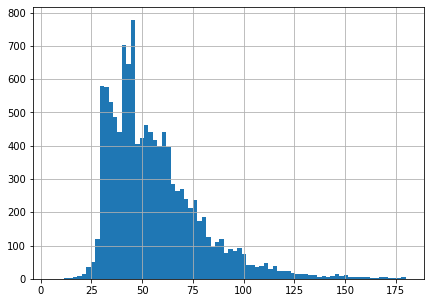

In [16]:
data['total_area'].hist(bins = 80, range = (5,180), figsize = (7,5))
data['total_area'].describe()

count   11650.00000
mean       32.52639
std        15.86791
min         2.00000
25%        19.00000
50%        30.00000
75%        41.10000
max       150.80000
Name: living_area, dtype: float64

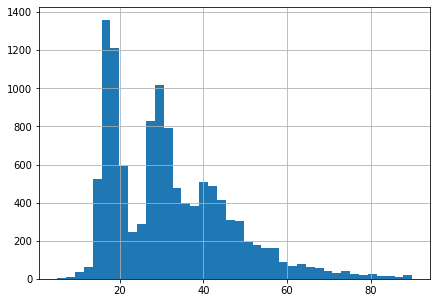

In [45]:
data['living_area'].hist(bins = 40, range = (5,90), figsize = (7,5))
data['living_area'].describe()

**не понятен спад в жилой площади на 22-25 кв.м.**

count   11650.00000
mean        9.90728
std         4.62157
min         2.00000
25%         7.00000
50%         9.00000
75%        11.30000
max        64.00000
Name: kitchen_area, dtype: float64

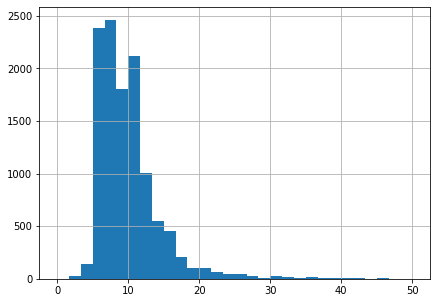

In [18]:
data['kitchen_area'].hist(bins = 30, range = (0,50), figsize = (7,5))
data['kitchen_area'].describe()

count      11650.00000
mean     5425723.20712
std      3067846.79747
min        12190.00000
25%      3500000.00000
50%      4600000.00000
75%      6450000.00000
max     20000000.00000
Name: last_price, dtype: float64

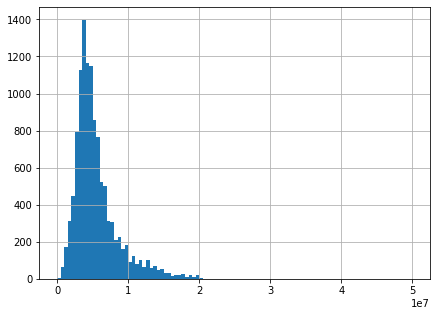

In [19]:
data['last_price'].hist(bins = 100, range = (0,50000000), figsize = (7,5))
data['last_price'].describe()

count   11578.00000
mean        2.02772
std         0.94999
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max         7.00000
Name: rooms, dtype: float64

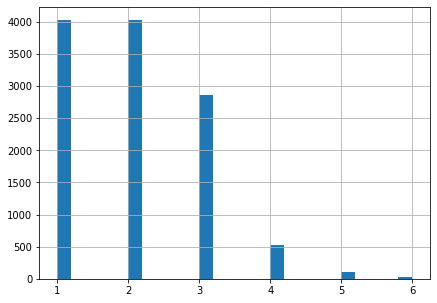

In [20]:
data['rooms'][data['rooms'] != 0].hist(bins = 25, range = (1,6), figsize = (7,5))
data['rooms'][data['rooms'] != 0].describe()

count   11650.00000
mean        2.70117
std         0.23481
min         2.20000
25%         2.50000
50%         2.65000
75%         2.77000
max         4.00000
Name: ceiling_height, dtype: float64

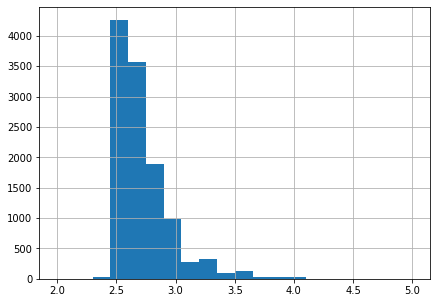

In [21]:
data['ceiling_height'][data['ceiling_height'] != 0].hist(bins = 20, range = (2,5), figsize = (7,5))
data['ceiling_height'][data['ceiling_height'] != 0].describe()

count   11650.00000
mean        5.69914
std         4.67489
min         1.00000
25%         2.00000
50%         4.00000
75%         8.00000
max        27.00000
Name: floor, dtype: float64

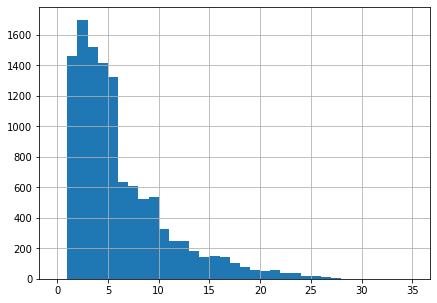

In [22]:
data['floor'].hist(bins = 35, range = (0,35), figsize = (7,5))
data['floor'].describe()

другой       8577
последний    1612
первый       1461
Name: floor_type, dtype: int64

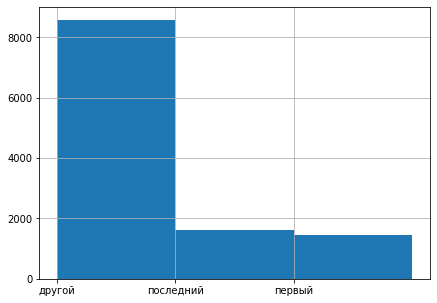

In [23]:
data['floor_type'].hist(bins = 3, range = (0,3), figsize = (7,5))
data['floor_type'].value_counts()

count   11644.00000
mean       10.39127
std         6.27718
min         1.00000
25%         5.00000
50%         9.00000
75%        14.00000
max        60.00000
Name: floors_total, dtype: float64

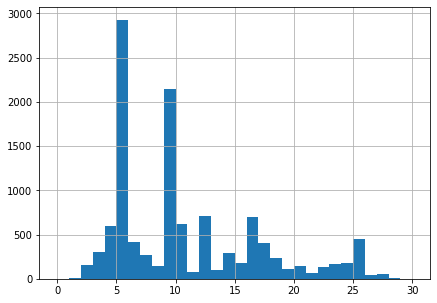

In [24]:
data['floors_total'][data['floors_total'] != 0].hist(bins = 30, range = (0,30), figsize = (7,5))
data['floors_total'][data['floors_total'] != 0].describe()

count    9284.00000
mean    14480.45875
std      8692.10755
min       208.00000
25%      9868.75000
50%     13221.50000
75%     16183.00000
max     65968.00000
Name: cityCenters_nearest, dtype: float64

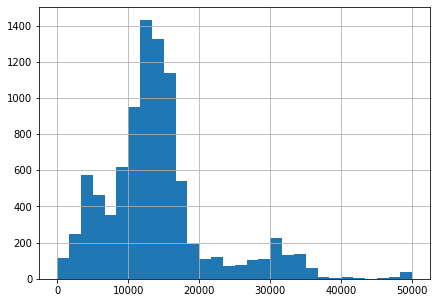

In [25]:
data['cityCenters_nearest'][data['cityCenters_nearest'] != 0].hist(bins = 30, range = (0,50000), figsize = (7,5))
data['cityCenters_nearest'][data['cityCenters_nearest'] != 0].describe()

count    9269.00000
mean    28957.86309
std     12867.78930
min      6914.00000
25%     18288.00000
50%     26956.00000
75%     37434.00000
max     84869.00000
Name: airports_nearest, dtype: float64

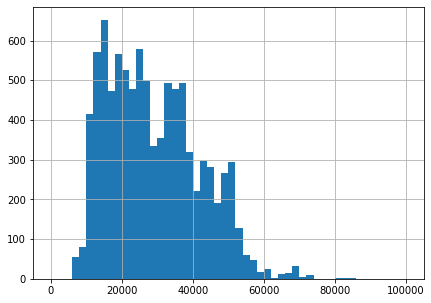

In [26]:
data['airports_nearest'][data['airports_nearest'] != 0].hist(bins = 50, range = (0,100000), figsize = (7,5))
data['airports_nearest'][data['airports_nearest'] != 0].describe()

count   4073.00000
mean     475.25068
std      314.26348
min        3.00000
25%      285.00000
50%      449.00000
75%      604.00000
max     3190.00000
Name: parks_nearest, dtype: float64

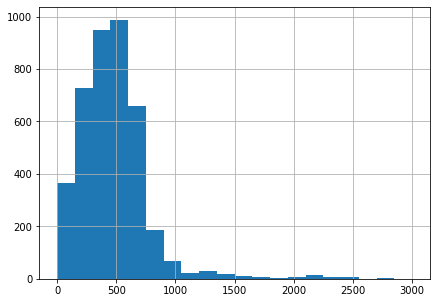

In [27]:
data['parks_nearest'][data['parks_nearest'] != 0].hist(bins = 20, range = (0,3000), figsize = (7,5))
data['parks_nearest'][data['parks_nearest'] != 0].describe()

0    1843
1    2118
2    1926
3    2159
4    1885
5     932
6     787
Name: day, dtype: int64

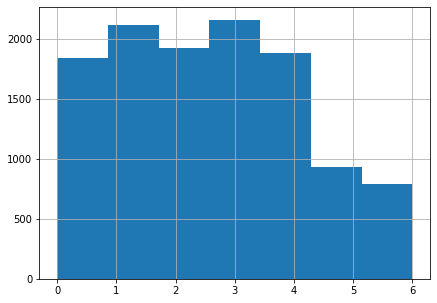

In [28]:
data['day'].hist(bins = 7, range = (0,6), figsize = (7,5))
data['day'].value_counts().sort_index()

1      739
2     1363
3     1214
4      813
5      575
6      829
7      925
8      971
9     1078
10    1151
11    1212
12     780
Name: month, dtype: int64

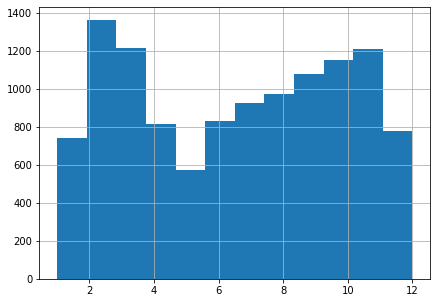

In [29]:
data['month'].hist(bins = 12, range = (1,12), figsize = (7,5))
data['month'].value_counts().sort_index()

В СПБ и области основная часть квартир от 40 до 70 кв.м.  
Жилая площадь от 18 до 42 кв.м, средняя кухня 9 - 10 кв.м.  
Самая дорогая квартира стоит 763 млн. рублей, самая дешевая 12 тыс. рублей, медианная квартиры цена 4,6 млн. рублей.  
Преобладают 1-2 комнатные квартиры, однако самое большое кол-во комнат 19.  
Стандартная высота потолков 2,5-2,8 метра.  
Самое высокое здание с квартирой в продаже 60 этажное, средняя этажность 9-10, больше всего 5 и 9 этажек  
Средние расстояния до:  
   - центра города - 14 км
   - аэропорта - 29 км
   - парка - 500 м  
  
Пик публикаций квартир приходиться на февраль - апрель и октябрь - ноябрь.  
Самый плохие месяца по публикациям приходятся на январь, май, июнь, декабрь.  
  
Чаще всего квартиры выкладывают в середине рабочей недели (вторник - четверг).  
В выходные объявления появляються реже всего.  


<AxesSubplot:>

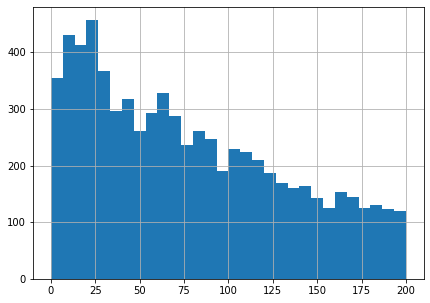

In [30]:
data_days = data.query('days_exposition != 45 and days_exposition != 60 and days_exposition != 7 and days_exposition != 30 and days_exposition != 90 and days_exposition != 0')
data_days['days_exposition'].hist(bins = 30, range = (0,200), figsize = (7,5))
#data_days['days_exposition']

Большая часть объявлений жили меньше 1 дня, скорее всего их удаляли по каким-то причинам, либо сами пользователи, либо модераторы.
По медиане квартиры 'висят' на сайте почти 3 месяца, в среднем же чуть более 5 месяцев.  
Быстрыми можно считать продажи до 22 дней, долгими от 200 дней.
Объявление долгожитель - 5 лет!

После того как убрал значения с 0  - появились какие-то странные значения на 45, 60 дни (возможно еще 7, 30, 90), которые отличаются от соседних дней более чем в 2 раза, тут нужно было бы уточнить данные.

<a id='5'></a>
####  Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
**общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).**
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

0.04055017333586794

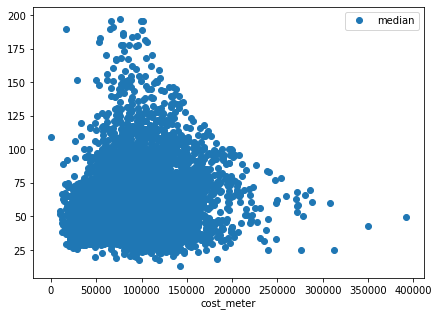

In [31]:
total_area = data.pivot_table(index = 'cost_meter', values = 'total_area', aggfunc = 'median')
total_area.columns = ['median']
total_area.plot(style = 'o', figsize = (7,5))

data['total_area'].corr(data['cost_meter'])

-0.04509486614611316

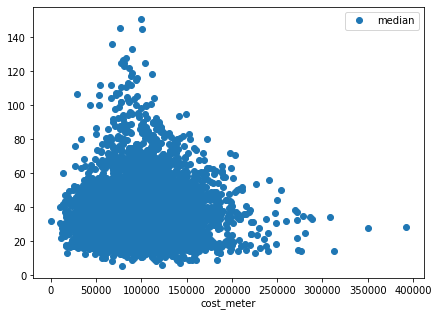

In [32]:
living_area = data.pivot_table(index = 'cost_meter', values = 'living_area', aggfunc = 'median')
living_area.columns = ['median']
living_area.plot(figsize = (7,5), style = 'o')
data['living_area'].corr(data['cost_meter'])

0.2576597465795133

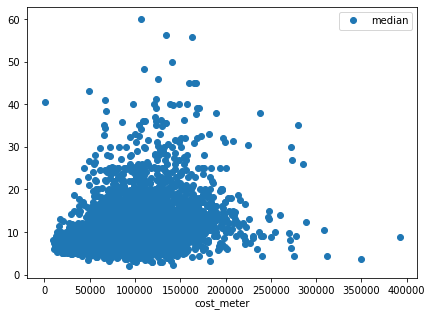

In [33]:
kitchen_area = data.pivot_table(index = 'cost_meter', values = 'kitchen_area', aggfunc = 'median')
kitchen_area.columns = ['median']
kitchen_area.plot(figsize = (7,5), style = 'o')
data['kitchen_area'].corr(data['cost_meter'])

,count,median,mean
rooms,,,
1,4030,101351.35135,101401.35715
2,4029,93333.33333,94662.51125
3,2859,88141.02564,90562.92094
4,519,86253.36927,88412.56697
5,113,84615.38462,85845.12262
6,25,89765.92270,91922.93007
7,3,88730.56995,84247.01372


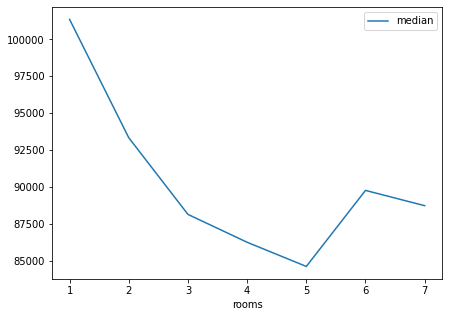

In [34]:
# значения с 0 квартир и с 8 и более комнатами слишком сильно влияли на график, 
# при очень малом кол-ве таких квартир в % соотношении 
rooms = data.pivot_table(index = 'rooms', values = 'cost_meter', aggfunc = ['count', 'median', 'mean'])
rooms.columns = ['count','median', 'mean']
rooms = rooms[rooms.index != 0]
rooms[rooms.index < 8].plot(y = 'median', figsize =(7,5))
rooms[rooms.index < 8]

,count,median
floor_type,,
другой,8577,97625.32982
первый,1461,81548.59967
последний,1612,88691.40151


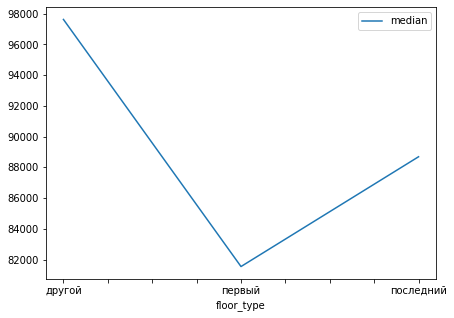

In [35]:
floors = data.pivot_table(index = 'floor_type', values = 'cost_meter', aggfunc = ['count', 'median'])
floors.columns = ['count', 'median']
floors.plot(y = 'median', figsize =(7,5))
floors

,count,median
day,,
0,1843,94794.34447
1,2118,95677.64946
2,1926,94955.38094
3,2159,95000.00000
4,1885,94102.56410
5,932,92362.89956
6,787,94594.59459


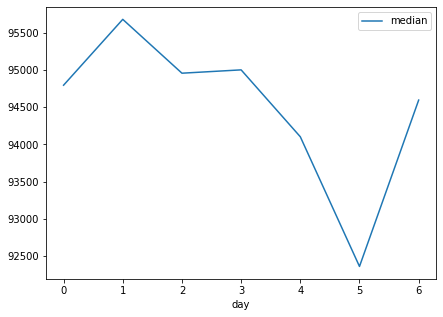

In [36]:
day = data.pivot_table(index = 'day', values = 'cost_meter', aggfunc = ['count','median'])
day.columns= ['count','median']
day.plot(y = 'median', figsize =(7,5))
day

,count,median
month,,
1,739,95112.28534
2,1363,94897.95918
3,1214,92888.74842
4,813,94594.59459
5,575,93333.33333
6,829,93181.81818
7,925,94308.94309
8,971,95827.53825
9,1078,96760.65574


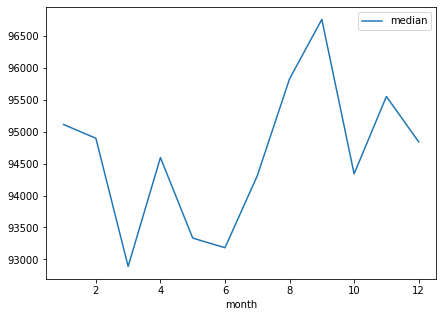

In [37]:
month = data.pivot_table(index = 'month', values = 'cost_meter', aggfunc = ['count','median'])
month.columns= ['count','median']
month.plot(y = 'median', figsize =(7,5))
month

,count,median
year,,
2014,59,102996.25468
2015,517,90000.00000
2016,1266,91012.82051
2017,4068,92755.38894
2018,4938,95918.64313
2019,802,105921.57595


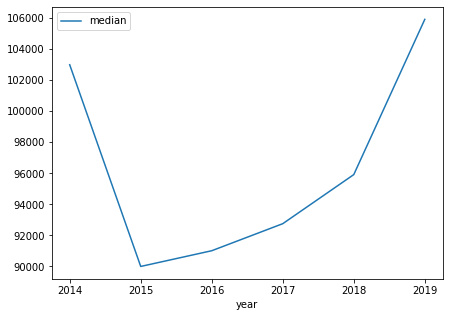

In [38]:
year = data.pivot_table(index = 'year', values = 'cost_meter', aggfunc = ['count','median'])
year.columns= ['count','median']
year.plot(y = 'median', figsize =(7,5))
year

Зависимость цены за квадрат от общей площади и прощади кухни есть - вместе с квадратурой растет и цена за квадрат, но она очень мала.  
По жилой площади такая же ситуация, как с общей площадью и кухней, зависимость есть, но она еще ниже.  
Минимальная цена за квадратный метр - у 3 комнатной  квартиры и снижается в ее сторону, корреляция настолько ничтожна что ей можно принебречь.  
Дороже всего квартиры не на первом и не на последнем этажах, что логично.

Разброс, в стоимости за кв метр по дням и месяцам, не велик, если смотреть на значения, однако по графикам можно определить, что:  
- самая высокая стоимость выставлялась во вторник, постепенно снижаясь к субботе, после чего начинала расти от воскресения ко вторнику.
- по месяцам - самые "дешевые": май, июнь; самые "дорогие": апрель и август.  

С 2014 по 2015 был резкий спад, который остаточно продолжился к 2016, в 2017 начался рост цены, который продолжался до 2019 набирая темпы. В целом для любых рынков свойственны взлеты и падения, чередующие друг друга, тут нет ничего удивительного. Однако фактический рост цены может быть ниже или его вообще может не быть, т.к. стоимость могла компесировать в себе инфляцию.


<a id='6'></a>
#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [39]:
data_locality = data.pivot_table(index = 'locality_name', values = 'cost_meter', aggfunc = ['mean', 'count'])
data_locality.columns = ['mean', 'count']
data_locality = data_locality.sort_values(by = 'count', ascending = False).head(10)
data_locality = data_locality.sort_values(by = 'mean', ascending = False)
data_locality

,mean,count
locality_name,,
санкт-петербург,107624.50098,8032
пушкин,99673.68189,182
деревня кудрово,90778.01364,122
поселок парголово,89670.43179,120
поселок мурино,87159.46557,213
петергоф,83156.10591,123
поселок шушары,78672.17616,190
колпино,75062.58953,179
гатчина,69148.51185,126


В топ 10 городов по кол-ву объявлений: cамые дорогие квартиры в Питере, самые дешевые в Выборге.

<a id='7'></a>
#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

,mean
count,30.00000
mean,106467.41715
std,22568.43246
min,65460.20308
25%,91822.54391
50%,105349.65555
75%,117360.82801
max,193918.91892


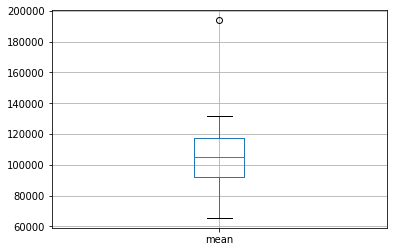

In [40]:
data_spb = data[data['locality_name'] == 'санкт-петербург']
data_spb = data_spb.pivot_table(index = 'range_centre', values = 'cost_meter', aggfunc = 'mean')
data_spb.columns = ['mean']
data_spb.boxplot()
data_spb.describe()

array([[<AxesSubplot:title={'center':'mean'}>]], dtype=object)

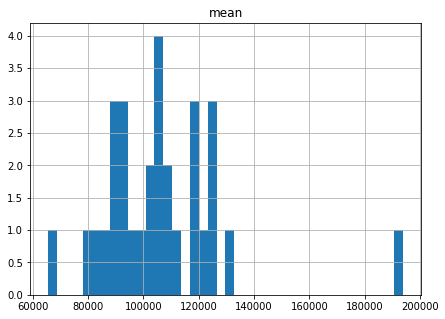

In [41]:
data_spb.hist(bins = 40, figsize = (7,5))

,mean
range_centre,
0,106523.18621
1,104565.34658
2,99879.95416
3,98616.40470
4,103234.68803
5,103229.65302
6,102353.74539
7,106102.02261
8,102447.54108


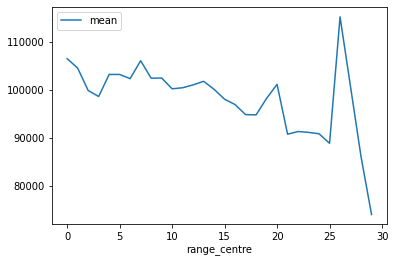

In [42]:
data_spb = data.query("locality_name == 'санкт-петербург' and 70000 < cost_meter < 130000")
data_spb = data_spb.pivot_table(index = 'range_centre', values = 'cost_meter', aggfunc = 'mean')
data_spb.columns = ['mean']

data_spb.plot()
data_spb

-0.13688639046976428

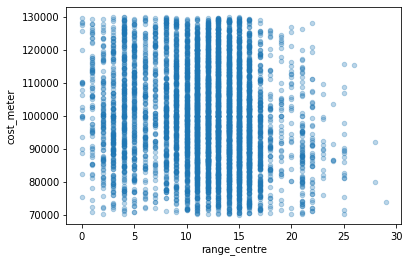

In [47]:
data_spb = data.query("locality_name == 'санкт-петербург' and 70000 < cost_meter < 130000")
data_spb.plot(kind = 'scatter', y = 'cost_meter', x = 'range_centre', alpha = 0.3)
data_spb['range_centre'].corr(data_spb['cost_meter'])


### Общий вывод

Открыли, рассмотрели,обработали, добавили и проанализировали данные по объявлениям о продаже квартир в СПБ.  
Важно отметить, что закрытие объявления не всегда является продажей.  
  
В качестве рекомендации к ведению базы данных:
- можно добавить район квартиры, чтобы можно было сортировать данные по СПБ и области.
- сделать обязательным полем кол-во этажей в доме, комнат.
  

[**Параметры объектов:**](#4) 
В СПБ и области основная часть квартир от 40 до 70 кв.м.  
Жилая площадь от 18 до 42 кв.м, средняя кухня 9 - 10 кв.м.  
Самая дорогая квартира стоит 763 млн. рублей, самая дешевая 12 тыс. рублей, медианная квартиры цена 4,6 млн. рублей.  
Преобладают 1-2 комнатные квартиры, однако самое большое кол-во комнат 19.  
Стандартная высота потолков 2,5-2,8 метра.  
Самое высокое здание с квартирой в продаже 60 этажное, средняя этажность 9-10, больше всего 5 и 9 этажек  
Средние расстояния до:  
   - центра города - 14 км
   - аэропорта - 29 км
   - парка - 500 м  
  
Пик публикаций квартир приходиться на февраль - апрель и октябрь - ноябрь.  
Самый плохие месяца по публикациям приходятся на январь, май, декабрь.  
  
Чаще всего квартиры выкладывают в середине рабочей недели (вторник - четверг).  
В выходные объявления появляються реже всего.  

Большая часть объявлений жили меньше 1 дня, скорее всего их удаляли по каким-то причинам, либо сами пользователи, либо модераторы. По медиане квартиры 'висят' на сайте почти 3 месяца, в среднем же чуть более 5 месяцев.
Быстрыми можно считать продажи до 22 дней, долгими от 200 дней. Объявление долгожитель - 5 лет!

[**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**](#5) 

Зависимость цены за квадрат от общей площади и прощади кухни есть - вместе с квадратурой растет и цена за квадрат, но она очень мала.  
По жилой площади такая же ситуация, как с общей площадью и кухней, зависимость есть, но она еще ниже.  
Минимальная цена за квадратный метр - у 3 комнатной  квартиры и снижается в ее сторону, корреляция настолько ничтожна что ей можно принебречь.  
Дороже всего квартиры не на первом и не на последнем этажах, что логично.

Разброс, в стоимости за кв метр по дням и месяцам, не велик, если смотреть на значения, однако по графикам можно определить, что:  
- самая высокая стоимость выставлялась во вторник, постепенно снижаясь к субботе, после чего начинала расти от воскресения ко вторнику.
- по месяцам - самые "дешевые": май, июнь; самые "дорогие": апрель и август.  

С 2014 по 2015 был резкий спад, который остаточно продолжился к 2016, в 2017 начался рост цены, который продолжался до 2019 набирая темпы. В целом для любых рынков свойственны взлеты и падения, чередующие друг друга, тут нет ничего удивительного. Однако фактический рост цены может быть ниже или его вообще может не быть, т.к. стоимость могла компесировать в себе инфляцию.

[**Цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.**](#6) 




In [44]:
data_locality

,mean,count
locality_name,,
санкт-петербург,107624.50098,8032
пушкин,99673.68189,182
деревня кудрово,90778.01364,122
поселок парголово,89670.43179,120
поселок мурино,87159.46557,213
петергоф,83156.10591,123
поселок шушары,78672.17616,190
колпино,75062.58953,179
гатчина,69148.51185,126


[**Как стоимость объектов зависит от расстояния до центра города СПБ**](#7)  
Можно сказать, что какой-то четкой зависимости нет, но есть очень слабая тендеция на снижение цены при удалении от центра.

<div class="info">



</div>
